In [2]:
#attempt to run model

#import statements
import numpy as np
import tensorflow as tf
import keras
from matplotlib import pyplot as plt
import numpy as np
import gzip
import math
import tensorflow.keras.layers as layers
import pandas as pd


In [4]:
#load data
case=np.load('fullcase_norm_M15norm_DNBFMN.npz')
case.files

#put in predictors and predictands
X= case['myarray'][:,:,:,2].flatten()
y= case['myarray'][:,:,:,3].flatten()
X.shape, y.shape

((103387536,), (103387536,))

In [5]:
#test train split
from sklearn.model_selection import train_test_split
# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) #, random_state=random_state)


X_train.shape, X_test.shape, y_train.shape, y_test.shape
#model

((82710028,), (20677508,), (82710028,), (20677508,))

In [6]:
#command for the GPU
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))


#add RMSE

from keras import backend
 
def rmse(y_true, y_pred):
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))
#
#number of nodes
n_units = 36

model = tf.keras.Sequential()
# First hidden layer:
model.add(layers.Dense(n_units, activation='relu', input_shape=(1,) ))
# Second hidden layer:
model.add(layers.Dense(n_units, activation='relu'))
# Output layer:  just 1 node and no activation function
model.add(layers.Dense(1, activation = 'sigmoid'))
model.summary()

model.compile(optimizer=keras.optimizers.Adam(0.01),  # Adam optimizer
            loss='mse',       # mean squared error
           metrics=['mae','mse'])  # mean absolute error


Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Quadro RTX 6000, pci bus id: 0000:1a:00.0, compute capability: 7.5
/job:localhost/replica:0/task:0/device:GPU:1 -> device: 1, name: Quadro RTX 6000, pci bus id: 0000:88:00.0, compute capability: 7.5
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:1 -> device: XLA_GPU device

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 36)                72        
_________________________________________________________________
dense_1 (Dense)              (None, 36)                1332      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 37        
Total params

In [9]:
#load EMA data
#case2=np.load('fullcase_norm_M15_DNBFMN.npz')
#case2.files
#XX= case2['myarray'][:,:,:,2].flatten()
#yy= case2['myarray'][:,:,:,3].flatten()

n_epochs = 2   # 250
history = model.fit(X_train, y_train,validation_data =(X_test,y_test), epochs=n_epochs, batch_size=100)   #validation_split=0.30


#pd.DataFrame(history.history).plot(figsize=(8,5))
#plt.grid(True)
#plt.gca().set_ylim(0,1)
#plt.show()

Epoch 1/2
827101/827101 [==============================] - 1010s 1ms/step - loss: 0.0081 - mae: 0.0678 - mse: 0.0081 - val_loss: 0.0080 - val_mae: 0.0675 - val_mse: 0.0080
Epoch 2/2
827101/827101 [==============================] - 997s 1ms/step - loss: 0.0081 - mae: 0.0678 - mse: 0.0081 - val_loss: 0.0080 - val_mae: 0.0672 - val_mse: 0.0080


In [10]:
model.save('FNN_attempt2')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: FNN_attempt2/assets


In [23]:
Xtrain_FNN_truths_FMN = model.predict(X_train[0:200])

for i in range (0,200):
    print(Xtrain_FNN_truths_FMN[i], y_train[i])

[0.39361972] 0.30159146
[0.5109839] 0.5419772
[0.36021587] 0.44510666
[0.34994218] 0.378991
[0.4780386] 0.40153235
[0.35413992] 0.39145994
[0.4686925] 0.35025564
[0.50009215] 0.41615564
[0.6230278] 0.8105329
[0.59496975] 0.5430276
[0.4171039] 0.5001536
[0.3833452] 0.33199653
[0.35671085] 0.33719411
[0.49286294] 0.51332283
[0.40233973] 0.31971592
[0.49805117] 0.3979235
[0.3808527] 0.43067163
[0.3869659] 0.46840173
[0.34968945] 0.31163675
[0.40777755] 0.43395716
[0.4833294] 0.61439466
[0.52505004] 0.45278192
[0.3579811] 0.37565145
[0.66108423] 0.8247525
[0.50748014] 0.38779745
[0.5886151] 0.37710592
[0.48788336] 0.67485464
[0.6425245] 0.77668077
[0.5466799] 0.4821905
[0.34291205] 0.31637654
[0.5762642] 0.6136675
[0.40371943] 0.3717735
[0.42738912] 0.37710592
[0.44305357] 0.39730415
[0.3431167] 0.3942879
[0.3641234] 0.3699961
[0.3457138] 0.3136834
[0.44449914] 0.35609984
[0.36732313] 0.32122403
[0.37091374] 0.385589
[0.49156854] 0.44478354
[0.56168944] 0.74794537
[0.5294923] 0.51876295
[0

In [ ]:

plt.scatter(y_train,Xtrain_FNN_truths_FMN, color='cornflowerblue', label='normalized DNB')
plt.xlabel('X value = Truth Train')
plt.ylabel('Y value = ML Train')
plt.legend()
plt.title('training vs ML vs DNB Full Moon Norm Radiances using M15 band')
plt.show()

In [30]:
AA = np.array(np.where(X_train < 0.5))
BB = np.array(np.where(X_train >= 0.5))
print (AA.shape, BB.shape)

(1, 82709145) (1, 883)


In [26]:
print(X_train[0:200])

[0.03982136 0.1093602  0.02288922 0.01712386 0.0706758  0.01948863
 0.06723164 0.09657527 0.2438814  0.209297   0.04852968 0.03561774
 0.02093067 0.08809017 0.04307387 0.09417985 0.03426116 0.03732258
 0.0169811  0.04509037 0.07689463 0.12589134 0.02164144 0.27895454
 0.10524672 0.20157874 0.08224378 0.26850373 0.15141231 0.01313385
 0.18667741 0.04358631 0.05229744 0.05799287 0.01325055 0.0250629
 0.01472858 0.0585162  0.02683542 0.02881678 0.08657064 0.16923875
 0.13112053 0.01227695 0.36150602 0.01722396 0.01970413 0.0939654
 0.04295584 0.27187997 0.03278408 0.15145274 0.0205378  0.135321
 0.0253246  0.02346214 0.06285018 0.01704234 0.11587116 0.02719643
 0.17456351 0.2710655  0.02814302 0.15045366 0.04104648 0.15380956
 0.09838346 0.18369338 0.19060703 0.01464447 0.01852464 0.01773755
 0.07253972 0.1734554  0.02261318 0.06481295 0.03254182 0.07562041
 0.08806689 0.05587098 0.01675255 0.01927482 0.03418131 0.11894289
 0.02128289 0.09678399 0.03294311 0.15785676 0.02351827 0.01992782

In [12]:
#now apply the model to other data
#load adata
applycase=np.load('EMA_norm_M15_DNBFMN.npz')
applycase.files

X= applycase['myarray'][:,:,:,2].flatten()
y=applycase['myarray'][:,:,:,3].flatten()

#load model
from tensorflow import keras
model = keras.models.load_model('FNN_attempt2')


#run model
TCEMA_FNN_truths_FMN = model.predict(X)




In [15]:
TCEMA_FNN_truths_FMN.max(),TCEMA_FNN_truths_FMN.min()


(0.999767, 0.3336826)

In [16]:
X.max(),X.min()

(1.0, 0.0)

In [17]:
y.max(),y.min()

(1.0, 0.29321587)

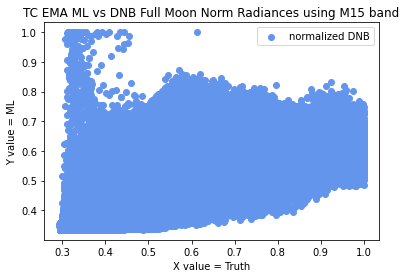

In [13]:
#basic stats X axis truth Y axis ML


plt.scatter(y, TCEMA_FNN_truths_FMN, color='cornflowerblue', label='normalized DNB')
plt.xlabel('X value = Truth')
plt.ylabel('Y value = ML')
plt.legend()
plt.title('TC EMA ML vs DNB Full Moon Norm Radiances using M15 band')
plt.show()


In [ ]:


plt.scatter(y, X, color='cornflowerblue', label='normalized DNB')
plt.xlabel('X value = Truth')
plt.ylabel('Y value = ML')
plt.legend()
plt.title('TC EMA ML vs DNB Full Moon Norm Radiances using M15 band')
plt.show()


In [ ]:
#return back to raw radiances so can apply image making
DNB_bounds = {'night': [2e-10, 3e-7],
              'full_moon': [1.26e-10, 1e-7],  # curtis
              'new_moon': [2e-11, 1e-9],
              'Miller_full_moon': [-9.5, -8.0]}

return (arr * (mx - mn)) + mn

